In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
jobData = pd.read_csv('cleaned_data.csv')
jobData.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,country_code_is_TW,country_code_is_UA,country_code_is_UG,country_code_is_US,country_code_is_VI,country_code_is_VN,country_code_is_ZA,country_code_is_ZM,country_code,NLP_Pred
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NOBENEFITS,False,...,False,False,False,True,False,False,False,False,US,4.299576e-125
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,False,...,False,False,False,False,False,False,False,False,NZ,0.000000e+00
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NODEPARTMENT,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NOBENEFITS,False,...,False,False,False,True,False,False,False,False,US,6.061253e-124
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,False,...,False,False,False,True,False,False,False,False,US,0.000000e+00
4,5,Bill Review Manager,"US, FL, Fort Worth",NODEPARTMENT,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,False,...,False,False,False,True,False,False,False,False,US,8.910345e-183


In [3]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(jobData['fraudulent'])
to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country_code', 'fraudulent']
X = jobData.copy()
X.drop(to_drop, axis = 1, inplace = True)
X.dtypes

telecommuting            bool
has_company_logo         bool
has_questions            bool
salary_lower_limit      int64
salary_upper_limit      int64
                       ...   
country_code_is_VI       bool
country_code_is_VN       bool
country_code_is_ZA       bool
country_code_is_ZM       bool
NLP_Pred              float64
Length: 135, dtype: object

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9938851603281134

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9798657718120806



<AxesSubplot:>

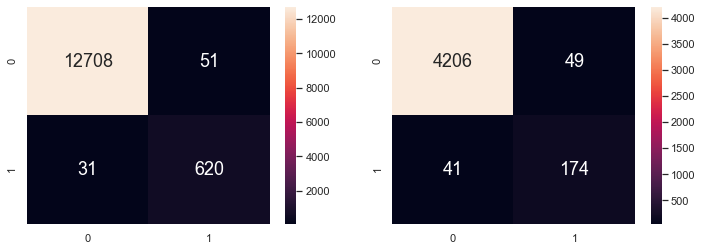

In [4]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier()  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

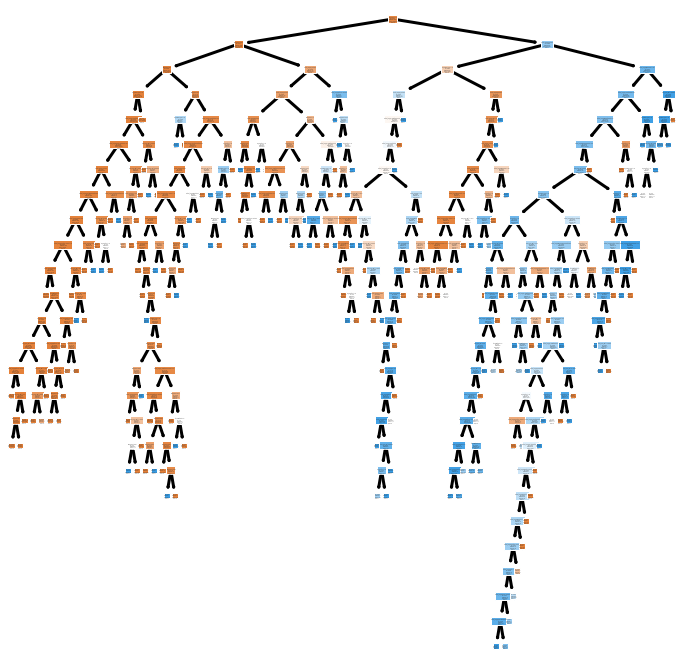

In [5]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()